These are the quaternions of the rotation of the camera respected to the ego car. 
You can use the pyquaternion library to convert it to yaw_pitch_roll.

[1.28400265 0.31639086 1.67877024]
[ 1.50612211 -0.03602647  1.69421848]
[ 1.27320628 -0.31664681  1.68114556]
[1.04338732 0.31565584 1.66400371]
[ 0.81558292 -0.00559198  1.65395645]
[ 1.04116266 -0.31121292  1.66718288]

The original image size is 1224 * 1024.

These are the translation the cameras respected to the ego car

[1.28400265 0.31639086 1.67877024]
[ 1.50612211 -0.03602647  1.69421848]
[ 1.27320628 -0.31664681  1.68114556]
[1.04338732 0.31565584 1.66400371]
[ 0.81558292 -0.00559198  1.65395645]
[ 1.04116266 -0.31121292  1.66718288]

In [1]:
!pwd

/Users/mintielaptop/Dropbox/NYU_Data_Science/Deep Learning/project/DLSP20Dataset/code


In [2]:
import numpy as np
import pandas as pd
import math

from PIL import Image
import torchvision.transforms as T
import torch

In [3]:
#local image path, will need to change for your notebook
PATH = "/Users/mintielaptop/Dropbox/NYU_Data_Science/Deep Learning/project/scene_106_sample_0/"

In [4]:
#in this case the matrix is transpose of the typical structure


intrinsics_big = {
    'CAM_FRONT_LEFT': 
              np.array([[879.03824732, 0.0,          613.17597314],
                [0.0,         879.03824732, 524.14407205],
                [0.0,         0.0,          4.0]]),
'CAM_FRONT': 
              np.array([[882.61644117, 0.0, 621.63358525],
                [0.0, 882.61644117, 524.38397862],
                [0.0, 0.0, 4.0]]),
'CAM_FRONT_RIGHT': 
    np.array([[880.41134027, 0.0, 618.9494972],
    [0.0, 880.41134027, 521.38918482],
    [0.0, 0.0, 4.0]]),
    
'CAM_BACK_LEFT': 
        np.array([[881.28264688, 0.0, 612.29732111],
    [0.0, 881.28264688, 521.77447199],
    [0.0, 0.0, 4.0]]),
'CAM_BACK': 
    np.array([[882.93018422, 0.0, 616.45479905],
    [0.0, 882.93018422, 528.27123027],
    [0.0, 0.0, 4.0]]),
'CAM_BACK_RIGHT': 
    np.array([[881.63835671, 0.0, 607.66308183],
    [0.0, 881.63835671, 525.6185326],
    [0.0, 0.0, 4.0]])}

In [5]:
image_names = [
    'CAM_FRONT_LEFT',
    'CAM_FRONT',
    'CAM_FRONT_RIGHT',
    'CAM_BACK_LEFT',
    'CAM_BACK',
    'CAM_BACK_RIGHT'
]

In [6]:
#need to scale all intrinsic values down by a factor of 4 beause Jason shrink the image
intrinsics = {}
for cam in image_names:
    intrinsics[cam] = intrinsics_big[cam]/4


In [7]:
intrinsics

{'CAM_FRONT_LEFT': array([[219.75956183,   0.        , 153.29399328],
        [  0.        , 219.75956183, 131.03601801],
        [  0.        ,   0.        ,   1.        ]]),
 'CAM_FRONT': array([[220.65411029,   0.        , 155.40839631],
        [  0.        , 220.65411029, 131.09599465],
        [  0.        ,   0.        ,   1.        ]]),
 'CAM_FRONT_RIGHT': array([[220.10283507,   0.        , 154.7373743 ],
        [  0.        , 220.10283507, 130.3472962 ],
        [  0.        ,   0.        ,   1.        ]]),
 'CAM_BACK_LEFT': array([[220.32066172,   0.        , 153.07433028],
        [  0.        , 220.32066172, 130.443618  ],
        [  0.        ,   0.        ,   1.        ]]),
 'CAM_BACK': array([[220.73254606,   0.        , 154.11369976],
        [  0.        , 220.73254606, 132.06780757],
        [  0.        ,   0.        ,   1.        ]]),
 'CAM_BACK_RIGHT': array([[220.40958918,   0.        , 151.91577046],
        [  0.        , 220.40958918, 131.40463315],
        [

In [8]:
int(round(151.91577046))

152

In [9]:
#looks like all the princpal points are C_u = int(round(intrinsic[0][2])), C_v = int(round(intrinsic[1][2]))

In [10]:
quaternion = {
'CAM_FRONT_LEFT': 
np.array([ 0.68316462, -0.68338771,  0.17581486, -0.18799863]),
 'CAM_FRONT':   
np.array([ 0.50745829, -0.49812866,  0.49496606, -0.49934369]),
 'CAM_FRONT_RIGHT':   
np.array([-0.19470424,  0.17808752, -0.68312934,  0.68095909]),
'CAM_BACK_LEFT': 
np.array([-0.67797289,  0.6871698,   0.19201452, -0.1768143 ]),
'CAM_BACK':    
np.array([-0.49033062,  0.50741961,  0.50819262, -0.49379061]),
'CAM_BACK_RIGHT':    
np.array([-0.17126042,  0.1897148,   0.68851343, -0.6786766 ]) }

In [11]:
translation = {
    'CAM_FRONT_LEFT': 
    [1.28400265, 0.31639086, 1.67877024],
    'CAM_FRONT':  
[ 1.50612211, -0.03602647,  1.69421848],
    'CAM_FRONT_RIGHT': 
[ 1.27320628, -0.31664681,  1.68114556],
    'CAM_BACK_LEFT':
[1.04338732, 0.31565584, 1.66400371],
    'CAM_BACK':
[ 0.81558292, -0.00559198,  1.65395645],
    'CAM_BACK_RIGHT':
[ 1.04116266, -0.31121292,  1.66718288]
    

    
}

In [12]:
#referr to https://en.wikipedia.org/wiki/Quaternions_and_spatial_rotation 
#Quaternion-derived rotation matrix
#scipy implementation
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.transform.Rotation.html
 
from scipy.spatial.transform import Rotation as Rot    
    

In [13]:
#check the angles of all cameras

In [14]:
r = Rot.from_quat(quaternion["CAM_FRONT"])
r.as_euler('zyx', degrees=True)

#so y in the front is 90 deg counter clock-wise 
#also  x for the front -130? I think its saying it's pointing 50 deg down from horizontal line 
#that means 0 is parallel to ground pointing back, 
 

array([  39.3028511 ,   88.98297443, -129.58659387])

In [15]:
r = Rot.from_quat(quaternion["CAM_BACK"])
r.as_euler('zyx', degrees=True)

#so y in the back is -90 deg counter clock-wise 
#x here means back camera means 0 is point to sky!, 
## using FRONT camera's 0 is parallel to ground as a reference, change to 8 deg  ##

array([-172.2672411 ,  -88.17938321,  -82.42121414])

In [16]:
r = Rot.from_quat(quaternion["CAM_FRONT_LEFT"])
r.as_euler('zyx', degrees=True)

#so y in here is  30 deg counter clock-wise 
#here x is assuming 0 is pointing parallel to the ground back keep

array([  89.72741595,   29.81356202, -178.90579948])

In [17]:
r = Rot.from_quat(quaternion["CAM_FRONT_RIGHT"])
r.as_euler('zyx', degrees=True)

#so y in the back should be 150 deg! why is it positive ## change and works
#x here is 0 is pointing parallel to the ground directly to the 'right'

array([-89.78478597,  30.56789854,  -1.45464565])

In [18]:
r = Rot.from_quat(quaternion["CAM_BACK_LEFT"])
r.as_euler('zyx', degrees=True)

#so y in here is  -30 deg counter clock-wise #but its giving me issues, try -150 deg

array([  91.20437685,  -30.22340848, -178.39888889])

In [19]:
r = Rot.from_quat(quaternion["CAM_BACK_RIGHT"])
r.as_euler('zyx', degrees=True)

#so y in here should be -150 deg! counter clock-wise  ## change but kept original y

array([-91.32482602, -29.56118841,  -1.89623567])

In [20]:
#let's try correcting CAM_BACK_LEFT by change y from -30 to -150
r = Rot.from_euler('zyx', [  91.20437685,  -150, -178.39888889], degrees=True)
r.as_quat() 

array([-0.1907042 ,  0.17546586,  0.67831433, -0.68755604])

In [21]:
r.as_quat()

array([-0.1907042 ,  0.17546586,  0.67831433, -0.68755604])

In [22]:
 #let's try correcting CAM_FRONT_RIGHT
r = Rot.from_euler('zyx', [-89.78478597,  150,  -1.45464565], degrees=True)
r.as_quat()

array([-0.6840013 ,  0.68192036, -0.19134027,  0.17468757])

In [23]:
r.as_matrix()

array([[-0.00325295, -0.86601929,  0.5       ],
       [-0.99971836, -0.00893775, -0.0219846 ],
       [ 0.02350796, -0.49993069, -0.86574631]])

In [24]:
#adjust quat
quaternion_adj = {
'CAM_FRONT_LEFT': 
np.array([ 0.68316462, -0.68338771,  0.17581486, -0.18799863]),
 'CAM_FRONT':   
np.array([ 0.50745829, -0.49812866,  0.49496606, -0.49934369]),
 'CAM_FRONT_RIGHT':   
#np.array([-0.19470424,  0.17808752, -0.68312934,  0.68095909]),
np.array([-0.6840013 ,  0.68192036, -0.19134027,  0.17468757]),
    
'CAM_BACK_LEFT': 
np.array([-0.67797289,  0.6871698,   0.19201452, -0.1768143 ]),
'CAM_BACK':    
np.array([-0.49033062,  0.50741961,  0.50819262, -0.49379061]),
'CAM_BACK_RIGHT':    
np.array([-0.17126042,  0.1897148,   0.68851343, -0.6786766 ]) #saw that we shuld keep it
    #np.array([ 0.6877757 , -0.67804142, -0.17392053,  0.19229162])
}

In [25]:
#adjust quat to angles - NOT CORRECT BECAUSE REFERNCE POINTS ARE DIFFERNT FROM FRONT , back , Left and Right
# format is zyx
#this adjusts all x axis assuming 0 is directly facing up. 
quaternion_adj2 = {
'CAM_FRONT_LEFT': 
np.array([ 0.68316462, -0.68338771,  0.17581486, -0.18799863]),
 'CAM_FRONT':   
np.array([ 0.50745829, -0.49812866,  0.49496606, -0.49934369]),
 'CAM_FRONT_RIGHT':   
#np.array([-0.19470424,  0.17808752, -0.68312934,  0.68095909]),
np.array([-0.6840013 ,  0.68192036, -0.19134027,  0.17468757]),
    
'CAM_BACK_LEFT': 
#np.array([-0.67797289,  0.6871698,   0.19201452, -0.1768143 ]),
np.array([-0.1907042 ,  0.17546586,  0.67831433, -0.68755604]),    
 
    
'CAM_BACK':    
np.array([-0.49033062,  0.50741961,  0.50819262, -0.49379061]),
'CAM_BACK_RIGHT':    
np.array([-0.17126042,  0.1897148,   0.68851343, -0.6786766 ]) 
#    np.array([ 0.6877757 , -0.67804142, -0.17392053,  0.19229162])
}

In [26]:
def gen_ex_matrix (quat, trans):
    assert len(quat) == 4
    r = Rot.from_quat(quat)
    
    m = r.as_matrix()
    trans = np.expand_dims(trans, axis = 1)
    res = np.concatenate((m, trans), axis =1)
    
    return res
    

In [27]:
def gen_p_inv_matrix(int_matrix, ex_matrix):
    return np.linalg.pinv(int_matrix.dot(ex_matrix))

In [28]:
extrinsics = {}
inv_matrix = {}

for cam in image_names:
    extrinsics[cam] = gen_ex_matrix(quaternion[cam], translation[cam])
    inv_matrix[cam] = gen_p_inv_matrix(intrinsics[cam], extrinsics[cam])


In [29]:
inv_matrix

{'CAM_FRONT_LEFT': array([[ 3.74711399e-04, -4.46204781e-03,  6.12783804e-01],
        [-1.90449152e-03,  5.25128939e-04,  3.13148666e-01],
        [ 3.11532389e-03,  2.85569251e-04, -1.13739756e+00],
        [ 1.04952829e-03,  2.58614075e-04,  1.06781371e-01]]),
 'CAM_FRONT': array([[-9.97649276e-06, -4.52977105e-03,  5.82333512e-01],
        [ 1.85093209e-03, -6.82850174e-05, -8.06553714e-01],
        [ 2.87907577e-03,  1.01512838e-04, -8.82143241e-01],
        [ 1.11166588e-03, -2.65910693e-05,  1.06651616e-01]]),
 'CAM_FRONT_RIGHT': array([[-3.60835562e-04, -4.44866065e-03,  5.50043397e-01],
        [ 3.65714895e-03,  2.17631884e-05, -1.15125922e+00],
        [ 1.33730694e-04,  6.40683025e-04,  1.23907585e-01],
        [ 1.04272637e-03, -2.59326383e-04,  1.75495554e-01]]),
 'CAM_BACK_LEFT': array([[ 2.64725237e-04, -4.43238059e-03,  6.42275221e-01],
        [-3.86264690e-03,  4.91950567e-05,  1.10901262e+00],
        [-4.17206289e-04,  6.74562516e-04, -2.31670286e-01],
        [ 9.

In [30]:
image_names

['CAM_FRONT_LEFT',
 'CAM_FRONT',
 'CAM_FRONT_RIGHT',
 'CAM_BACK_LEFT',
 'CAM_BACK',
 'CAM_BACK_RIGHT']

In [31]:
rot_matrix = {}

angles = [60, 0, 300, 120, 180, 240]
for i, cam in enumerate(image_names):
     
    rad = math.radians(angles[i])
    R = np.array([[math.cos(rad), -math.sin(rad)], [math.sin(rad), math.cos(rad)]])
    rot_matrix[cam] = R
# to convert camera to front camera axis do R.dot((Xw_cam, Zw_cam))

In [32]:
math.radians(180)

3.141592653589793

In [33]:
math.cos(math.radians(180))

-1.0

In [34]:
rot_matrix

{'CAM_FRONT_LEFT': array([[ 0.5      , -0.8660254],
        [ 0.8660254,  0.5      ]]),
 'CAM_FRONT': array([[ 1., -0.],
        [ 0.,  1.]]),
 'CAM_FRONT_RIGHT': array([[ 0.5      ,  0.8660254],
        [-0.8660254,  0.5      ]]),
 'CAM_BACK_LEFT': array([[-0.5      , -0.8660254],
        [ 0.8660254, -0.5      ]]),
 'CAM_BACK': array([[-1.0000000e+00, -1.2246468e-16],
        [ 1.2246468e-16, -1.0000000e+00]]),
 'CAM_BACK_RIGHT': array([[-0.5      ,  0.8660254],
        [-0.8660254, -0.5      ]])}

In [35]:
R= rot_matrix["CAM_BACK"]
R.dot(np.array([1, 1]))

array([-1., -1.])

In [36]:
#emperically figure out s-value for each camera

s_val ={
    
    'CAM_FRONT_LEFT': 3.571428571428571 ,
 'CAM_FRONT': 3.745318352059925,
 'CAM_FRONT_RIGHT':  3.236245954692557,
 'CAM_BACK_LEFT': 3.1847133757961785 ,
 'CAM_BACK':  2.7027027027027026,
 'CAM_BACK_RIGHT':2.8490028490028494
    
}

In [37]:
cam = 'CAM_FRONT_LEFT'
C_u = int(round(intrinsics[cam][0][2])), 
C_v = int(round(intrinsics[cam][1][2]))
uu = np.array([300, 301, 302]) - C_u
vv = np.array([200, 201, 202]) - C_v
cam_u_v = np.array([uu,vv,[1,1,1]])/0.28
world_dim = inv_matrix[cam].dot(cam_u_v)
world_dim

array([[ 1.285661  ,  1.27106337,  1.25646574],
       [ 0.24793682,  0.24301052,  0.23808423],
       [-2.35621668, -2.34407063, -2.33192459],
       [ 0.99609429,  1.00076622,  1.00543816]])

In [38]:
#can we get back
intrinsics[cam].dot(extrinsics[cam].dot(world_dim))

array([[525.        , 528.57142857, 532.14285714],
       [246.42857143, 250.        , 253.57142857],
       [  3.57142857,   3.57142857,   3.57142857]])

In [39]:
cam_u_v

array([[525.        , 528.57142857, 532.14285714],
       [246.42857143, 250.        , 253.57142857],
       [  3.57142857,   3.57142857,   3.57142857]])

In [40]:
#okay it works

In [41]:
1/0.28

3.571428571428571

In [42]:
cam = 'CAM_FRONT'
C_u = int(round(intrinsics[cam][0][2])), 
C_v = int(round(intrinsics[cam][1][2]))
uu = np.array([300, 301, 302]) - C_u
vv = np.array([200, 201, 202]) - C_v
cam_u_v = np.array([uu,vv,[1,1,1]])/0.267
world_dim = inv_matrix[cam].dot(cam_u_v)
world_dim

array([[ 1.00499145,  0.98798865,  0.97098585],
       [-2.03325928, -2.0265827 , -2.01990612],
       [-1.71413059, -1.70296734, -1.69180409],
       [ 0.99628608,  1.00035003,  1.00441398]])

In [43]:
 1/0.267

3.745318352059925

In [44]:
cam = 'CAM_FRONT_RIGHT'
C_u = int(round(intrinsics[cam][0][2])), 
C_v = int(round(intrinsics[cam][1][2]))
uu = np.array([300, 301, 302]) - C_u
vv = np.array([200, 201, 202]) - C_v
cam_u_v = np.array([uu,vv,[1,1,1]])#/0.267
world_dim = inv_matrix[cam].dot(cam_u_v)
world_dim

array([[ 0.18631599,  0.1815065 ,  0.176697  ],
       [-0.6194492 , -0.61577029, -0.61209138],
       [ 0.18814635,  0.18892076,  0.18969518],
       [ 0.30853803,  0.30932143,  0.31010483]])

In [45]:
1/0.309

3.236245954692557

In [46]:
cam = 'CAM_BACK_LEFT'
C_u = int(round(intrinsics[cam][0][2])), 
C_v = int(round(intrinsics[cam][1][2]))
uu = np.array([300, 301, 302]) - C_u
vv = np.array([200, 201, 202]) - C_v
cam_u_v = np.array([uu,vv,[1,1,1]])#/0.267
world_dim = inv_matrix[cam].dot(cam_u_v)
world_dim

array([[ 0.37092319,  0.36675553,  0.36258788],
       [ 0.54464718,  0.54083373,  0.53702028],
       [-0.24578023, -0.24552288, -0.24526552],
       [ 0.31240168,  0.31364602,  0.31489037]])

In [47]:
1/.314

3.1847133757961785

In [48]:
cam = 'CAM_BACK'
C_u = int(round(intrinsics[cam][0][2])), 
C_v = int(round(intrinsics[cam][1][2]))
uu = np.array([300, 301, 302]) - C_u
vv = np.array([200, 201, 202]) - C_v
cam_u_v = np.array([uu,vv,[1,1,1]])#/0.267
world_dim = inv_matrix[cam].dot(cam_u_v)
world_dim

array([[0.29975401, 0.29509623, 0.29043845],
       [0.38684136, 0.38549058, 0.3841398 ],
       [0.33040936, 0.32669805, 0.32298673],
       [0.36938924, 0.37022308, 0.37105692]])

In [49]:
1/0.370

2.7027027027027026

In [50]:
cam = 'CAM_BACK_RIGHT'
C_u = int(round(intrinsics[cam][0][2])), 
C_v = int(round(intrinsics[cam][1][2]))
uu = np.array([300, 301, 302]) - C_u
vv = np.array([200, 201, 202]) - C_v
cam_u_v = np.array([uu,vv,[1,1,1]])#/0.267
world_dim = inv_matrix[cam].dot(cam_u_v)
world_dim

array([[ 0.19080096,  0.18595685,  0.18111274],
       [-0.12576164, -0.12300252, -0.12024339],
       [ 0.54548027,  0.54275377,  0.54002726],
       [ 0.35013494,  0.35080259,  0.35147024]])

In [51]:
1/0.351

2.8490028490028494

In [52]:
#refer to this image https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#void
#translate u, v ( col idx, row idx) in camera image to Xw, Yw, Zw in real world, and take Zw, Xw (col idx, row idx in BEV)
# for each camera, need to rotate Zw, Xw to CAM FRONT Xw, Zw so it's all in the same canonical 
# stitch together, resize if necessary



In [53]:
#mapping
##each image size 256 (v, nrow), 306 (u, ncol)


In [54]:
def gen_cam_UV_m (cam, intrinsics, s_val):
    C_u = int(round(intrinsics[cam][0][2]))
    C_v = int(round(intrinsics[cam][1][2]))
    uu  = np.array(range(306)) - C_u
    vv = np.array(range(256)) - C_v
    #create all paris
    output = [[u, v, 1] for u in uu  
          for v in vv]
    
    result = np.array(output).T
    #result = result*s_val[cam]
    return result
    
 

In [55]:
306*256

78336

In [56]:
test_res = gen_cam_UV_m('CAM_FRONT_LEFT', intrinsics, s_val)

In [57]:
test_res.shape

(3, 78336)

In [58]:
def gen_world_dim (cam, cam_uv_m, inv_matrix):
    world_dim = inv_matrix[cam].dot(cam_uv_m)
    return world_dim

In [59]:
test_wdim = gen_world_dim('CAM_FRONT_LEFT', test_res, inv_matrix)

In [60]:
test_wdim #definitely some distortion there seeing the fourth row are not 1's 

array([[ 1.13998122,  1.13551918,  1.13105713, ...,  0.1253701 ,
         0.12090806,  0.11644601],
       [ 0.53574398,  0.53626911,  0.53679424, ...,  0.08773168,
         0.08825681,  0.08878194],
       [-1.65145169, -1.65116612, -1.65088055, ..., -0.62902888,
        -0.62874331, -0.62845774],
       [-0.0876749 , -0.08741629, -0.08715767, ...,  0.29786059,
         0.2981192 ,  0.29837782]])

In [61]:
test_wdim.shape

(4, 78336)

In [62]:
print(min(test_wdim[0]))

0.002159030847684096


In [63]:
print(max(test_wdim[0]))

1.2542681998263467


In [64]:
print(min(test_wdim[2]))

-1.6514516878398555


In [65]:
print(max(test_wdim[2]))

-0.628457742536753


In [66]:
test_wdim[0].shape

(78336,)

In [67]:
np.stack((test_wdim[0], test_wdim[2]), axis=0)

array([[ 1.13998122,  1.13551918,  1.13105713, ...,  0.1253701 ,
         0.12090806,  0.11644601],
       [-1.65145169, -1.65116612, -1.65088055, ..., -0.62902888,
        -0.62874331, -0.62845774]])

In [68]:
def gen_BEV_XZ (cam, wdim, rot_matrix, axis = "XZ" ):
    
    R = rot_matrix[cam]
    if axis == "XZ":
        cam_XZ = np.stack((wdim[0], wdim[2]), axis=0)
    elif axis == "XY":
        cam_XZ = np.stack((wdim[0], wdim[1]), axis=0) #try using the world Y axis
    
    else:
        print("axis must be XZ or XY")
    result = R.dot(cam_XZ)
    return result

In [69]:
bev_XZ = gen_BEV_XZ('CAM_FRONT_LEFT', test_wdim, rot_matrix)

In [70]:
bev_XZ

array([[ 2.00018973,  1.99771139,  1.99523306, ...,  0.60744004,
         0.60496171,  0.60248337],
       [ 0.16152686,  0.15780539,  0.15408393, ..., -0.20594075,
        -0.20966221, -0.21338367]])

In [71]:
print(min(bev_XZ[0]))

0.6024833740644007


In [72]:
print(max(bev_XZ[0]))

2.0001897263064667


In [73]:
print(min(bev_XZ[1]))

-0.7874459888510774


In [74]:
print(max(bev_XZ[1]))

0.7355891734330144


In [75]:
import matplotlib
import matplotlib.pyplot as plt

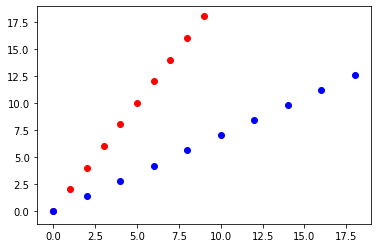

In [76]:
plt.scatter(np.arange(10), np.arange(10)*2, color = 'r')
plt.scatter(np.arange(10)*2, np.arange(10)*1.4, color = 'b')


In [77]:
##put it all together
# allCam_map_dict ={}
# min_max_dict = {}
# color_list = ['b', 'g', 'r', 'c', 'm', 'k']
 
# for j, cam in enumerate(image_names):
    

#     #allCam_map_dict[cam] = {}
#     map_dict = {} 
#     col_ind  = np.arange(306)
#     row_ind = np.arange(256)
#     all_cam_row_col = [(r,c) for r in row_ind for c in col_ind]
#     row_col_ind_dict = {}
#     for i, pair in enumerate(all_cam_row_col):
#         row_col_ind_dict[pair] = i #use later to map from cam image (row, col) to BEV (row, col)
        
        
#     #generate camera X_w, Y_w, Z_w
#     test_res = gen_cam_UV_m(cam, intrinsics, s_val)
#     test_wdim = gen_world_dim(cam, test_res, inv_matrix)
    
#     #rotate Z_w, X_w into BEV Z_w, X_w
#     bev_XZ = gen_BEV_XZ(cam, test_wdim, rot_matrix)
#     print(bev_XZ.shape)
#     #create the mapping 
#     bev_X = bev_XZ[0]
#     bev_Z = bev_XZ[1]
#     for pair, ind in row_col_ind_dict.items():
    
#         map_dict[pair] = (bev_X[ind], bev_Z[ind]) 
#     allCam_map_dict[cam] = map_dict
#     min_max_dict[cam] = [min(bev_X), max(bev_X), min(bev_Z), max(bev_Z)] 
    
#     #plotting
#     plt.scatter(bev_Z*3000, bev_X*3000, color = color_list[j])
    
    

In [78]:
# import pickle


# f = open("allCam_map_dict.pkl","wb")
# pickle.dump(allCam_map_dict,f)
# f.close()

# f = open("min_max_dict.pkl","wb")
# pickle.dump(min_max_dict,f)

# f.close()


In [79]:
col_ind  = np.arange(306)
row_ind = np.arange(256)
all_cam_row_col = [(r,c) for r in row_ind for c in col_ind]

In [125]:
#try it with the correct right camera Y angles
#intrinsics is given
#translation is given

# extrinsics_adj crateded with quaternion_adj
#inv_matrix recreated 
def gen_trans_maps(image_names, intrinsics, translation, quaternion, all_cam_row_col, axis = "XZ"):
    
    extrinsics_adj = {}
    inv_matrix_adj = {}

    for cam in image_names:

        extrinsics_adj[cam] = gen_ex_matrix(quaternion[cam], translation[cam]) #use quaternion_adj2
        inv_matrix_adj[cam] = gen_p_inv_matrix(intrinsics[cam], extrinsics_adj[cam])


    ##put it all together
    allCam_map_dict ={}
    min_max_dict = {}
    color_list = ['b', 'g', 'r', 'c', 'm', 'k']

    for j, cam in enumerate(image_names):

        #allCam_map_dict[cam] = {}
        map_dict = {} 
        
        row_col_ind_dict = {}
        for i, pair in enumerate(all_cam_row_col):
            row_col_ind_dict[pair] = i #use later to map from cam image (row, col) to BEV (row, col)




        #generate camera X_w, Y_w, Z_w
        test_res = gen_cam_UV_m(cam, intrinsics, s_val)
        test_wdim = gen_world_dim(cam, test_res, inv_matrix_adj)

        #rotate Z_w, X_w into BEV Z_w, X_w
        bev_XZ = gen_BEV_XZ(cam, test_wdim, rot_matrix, axis = axis) #try XY sometimes
        print(bev_XZ.shape)
        #create the mapping 
        bev_X = bev_XZ[0]*200
        bev_Z = bev_XZ[1]*200
        for pair, ind in row_col_ind_dict.items():

            map_dict[pair] = (bev_X[ind], bev_Z[ind]) 
        allCam_map_dict[cam] = map_dict
        min_max_dict[cam] = [min(bev_X), max(bev_X), min(bev_Z), max(bev_Z)] 

        #plotting
        plt.scatter(bev_Z, bev_X, color = color_list[j])
        
    return allCam_map_dict, min_max_dict

(2, 78336)
(2, 78336)
(2, 78336)
(2, 78336)
(2, 78336)
(2, 78336)


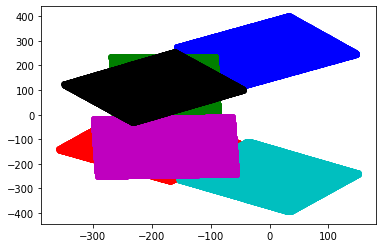

In [126]:
allCam_map_dict, min_max_dict = gen_trans_maps(image_names, intrinsics, translation, 
                                               quaternion_adj2,all_cam_row_col, axis = "XZ")

In [127]:
min_max_dict

{'CAM_FRONT_LEFT': [120.49667481288013,
  400.0379452612934,
  -157.48919777021547,
  147.1178346866029],
 'CAM_FRONT': [3.829085563747392,
  235.45597521081865,
  -268.33963342609485,
  -87.53885670232947],
 'CAM_FRONT_RIGHT': [-268.4472604803732,
  11.843686417262772,
  -357.2535753632726,
  -53.31707175930398],
 'CAM_BACK_LEFT': [-393.1164065143152,
  -109.46337364451726,
  -153.0595075433541,
  150.23517087811734],
 'CAM_BACK': [-248.85354393141185,
  -10.011061617700209,
  -298.56026114450793,
  -56.711712535921635],
 'CAM_BACK_RIGHT': [-29.60680760651827,
  253.6961135335384,
  -348.10182854858544,
  -45.539162716590376]}

In [128]:
## okay how to piece them together
#first let's check image


In [129]:
allCam_map_dict["CAM_FRONT"]

{(0, 0): (235.45597521081865, -268.33963342609485),
 (0, 1): (234.55002100066667, -268.31933085852626),
 (0, 2): (233.64406679051467, -268.29902829095766),
 (0, 3): (232.7381125803627, -268.278725723389),
 (0, 4): (231.83215837021072, -268.2584231558205),
 (0, 5): (230.92620416005877, -268.2381205882519),
 (0, 6): (230.0202499499068, -268.2178180206833),
 (0, 7): (229.11429573975485, -268.19751545311476),
 (0, 8): (228.20834152960288, -268.17721288554617),
 (0, 9): (227.3023873194509, -268.1569103179776),
 (0, 10): (226.39643310929893, -268.136607750409),
 (0, 11): (225.49047889914698, -268.1163051828404),
 (0, 12): (224.584524688995, -268.0960026152718),
 (0, 13): (223.67857047884306, -268.07570004770326),
 (0, 14): (222.77261626869108, -268.0553974801347),
 (0, 15): (221.86666205853908, -268.035094912566),
 (0, 16): (220.9607078483871, -268.0147923449975),
 (0, 17): (220.05475363823516, -267.9944897774289),
 (0, 18): (219.14879942808318, -267.9741872098603),
 (0, 19): (218.2428452179

In [148]:
#cam = "CAM_BACK_RIGHT"
def convert_show_img(cam, min_max_dict, allCam_map_dict, all_cam_row_col, PATH):
    img = Image.open(PATH+cam+".jpeg")
    t = T.ToTensor()
    m = t(img)
    print(m.shape)
    print("orig image mean{}".format( m.mean()))
    row_min = min_max_dict[cam][0]
    row_max = min_max_dict[cam][1]
    col_min = min_max_dict[cam][2] 
    col_max = min_max_dict[cam][3]#adjusting
    img_list = []

    ind_map = allCam_map_dict[cam]
    for i in [0,1,2]:
        channel_i  = m[i]
        avg_val = channel_i.mean()
        base_tensor = torch.ones((int(row_max-row_min+4), 
                                  int(col_max-col_min+4)))*avg_val #initialize with average val

        for pair in all_cam_row_col:
            new_row, new_col = ind_map[pair]
            new_row = int(round(new_row - row_min))
            new_col = int(round(new_col - col_min))

            base_tensor[new_row, new_col] = channel_i[pair[0], pair[1]]
        img_list.append(base_tensor)
        
    trans_tensor = torch.stack(img_list, dim=0)
    print(trans_tensor.shape)
    print(trans_tensor.mean())    
    
    toImg = T.ToPILImage()
    trans_img = toImg(trans_tensor)
    toResize = T.Resize((400,400))
    trans_img = toResize(trans_img)
    return trans_img

In [149]:
#generate all transformations and print picture
PATH = "/Users/mintielaptop/Dropbox/NYU_Data_Science/Deep Learning/project/scene_106_sample_0/"
trans_list = []
 

for cam in image_names:
    trans_img = convert_show_img(cam, min_max_dict, allCam_map_dict,all_cam_row_col, PATH)
    trans_list.append(trans_img)

torch.Size([3, 256, 306])
orig image mean0.4158973693847656
torch.Size([3, 283, 308])
tensor(0.4166)
torch.Size([3, 256, 306])
orig image mean0.4889695942401886
torch.Size([3, 235, 184])
tensor(0.4902)
torch.Size([3, 256, 306])
orig image mean0.5456956624984741
torch.Size([3, 284, 307])
tensor(0.5461)
torch.Size([3, 256, 306])
orig image mean0.41098126769065857
torch.Size([3, 287, 307])
tensor(0.4116)
torch.Size([3, 256, 306])
orig image mean0.4967092275619507
torch.Size([3, 242, 245])
tensor(0.4968)
torch.Size([3, 256, 306])
orig image mean0.47694629430770874
torch.Size([3, 287, 306])
tensor(0.4774)


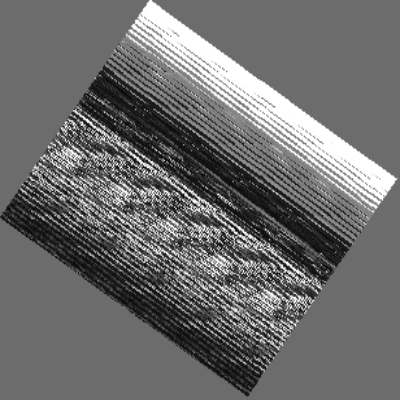

In [146]:
trans_list[0]

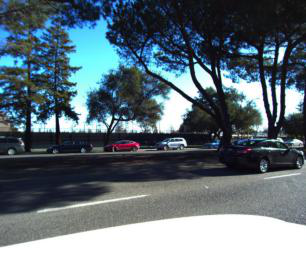

In [133]:
pic = Image.open(PATH+image_names[0]+".jpeg")
pic

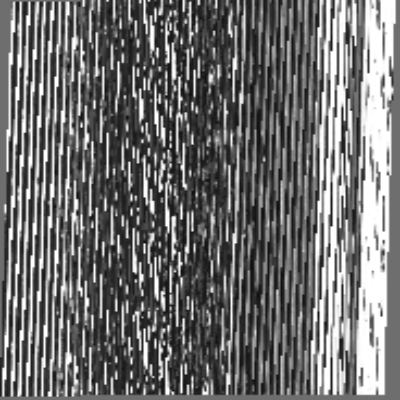

In [147]:
trans_list[1]

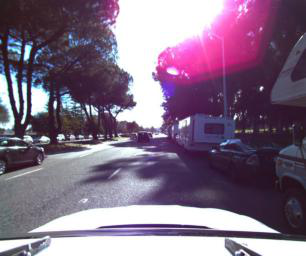

In [135]:
pic = Image.open(PATH+image_names[1]+".jpeg")
pic

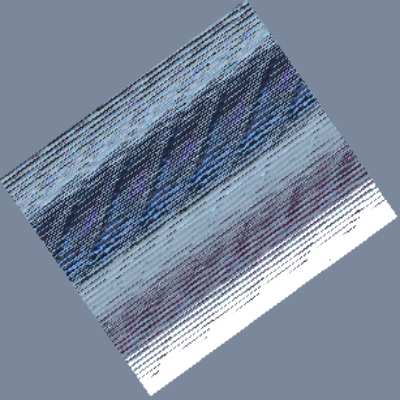

In [136]:
trans_list[2]

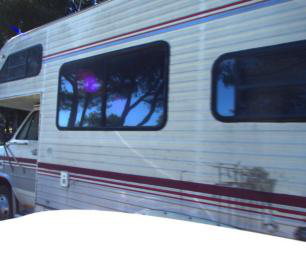

In [137]:
pic = Image.open(PATH+image_names[2]+".jpeg")
pic

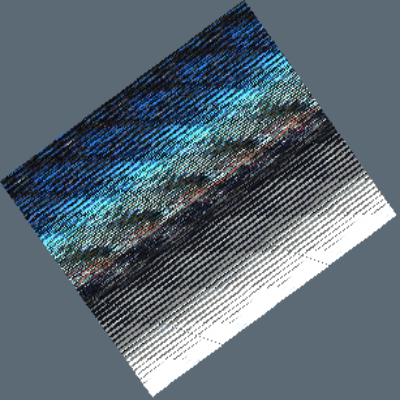

In [138]:
trans_list[3]

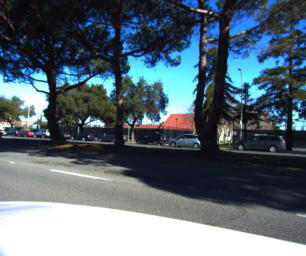

In [139]:
pic = Image.open(PATH+image_names[3]+".jpeg")
pic

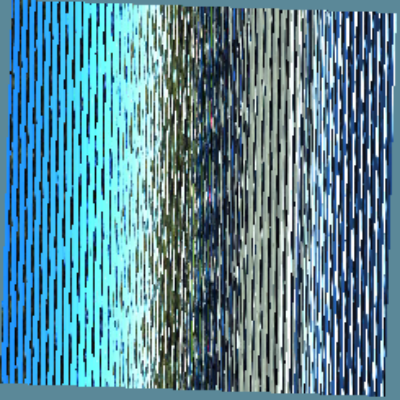

In [140]:
trans_list[4]

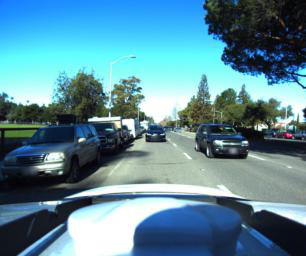

In [141]:
pic = Image.open(PATH+image_names[4]+".jpeg")
pic

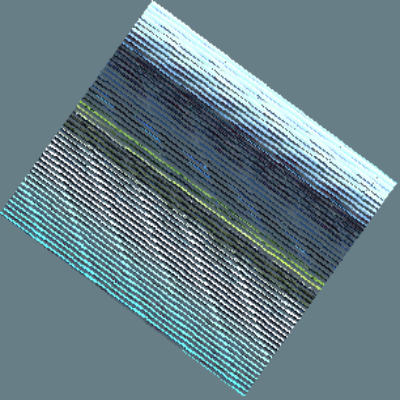

In [142]:
trans_list[5]

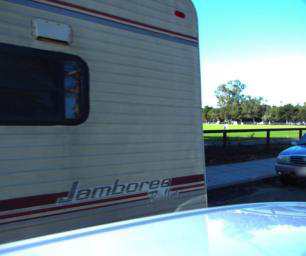

In [143]:
pic = Image.open(PATH+image_names[5]+".jpeg")
pic